In [1]:
import torch
from torch import nn
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt


In [2]:
device= "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cpu


In [16]:
# i) learn how to model sequence-to-sequence learning problems using Recurrent Neural Networks.

In [17]:
# ii) compare different cells such as vanilla RNN, LSTM and GRU.



In [18]:
# Generate sine wave data
def generate_data(seq_length, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        x = np.linspace(i * 2 * np.pi, (i + 1) * 2 * np.pi, seq_length + 1)
#         print(x.shape)
        sine_wave = np.sin(x)
        X.append(sine_wave[:-1])  # input sequence
        y.append(sine_wave[1:])   # target sequence
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000
X, y = generate_data(seq_length, num_samples)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

print(X.shape, y.shape)  # Output: (1000, 50), (1000, 50)

torch.Size([1000, 50]) torch.Size([1000, 50])


In [19]:
print(X[0].shape)
print(X.unsqueeze(2).squeeze(2).shape)

torch.Size([50])
torch.Size([1000, 50])


In [20]:
# # Plot results
# plt.figure(figsize=(10, 6))
# plt.plot(X[0].numpy(), label='True')
# plt.plot(y[0].numpy(), label='True')

In [21]:
# vanella flavour
import torch 
import torch.nn as nn

    
# Define model hyperparameters

vocab_size = 50    # Size of the character vocabulary
embedding_dim = 64 # Dimension of character embeddings
hidden_dim = 128   # Dimension of RNN hidden state
output_dim = 1    # Dimension of the output
input_size=1 #number of expected features in x

class SimpleRNN(nn.Module):
    def __init__(self,input_size, hidden_dim, output_dim):
        super(SimpleRNN,self).__init__()
#         self.embedding=nn.Embedding(vocab_size,embedding_dim)
        self.rnn=nn.RNN(input_size, hidden_size=hidden_dim)
        self.fc=nn.Linear(hidden_dim,output_dim)
        
     
    def forward(self,x):
        encoder_output, hidden_state=self.rnn(x)
#         print("hidden state is ")
#         print(hidden_state.shape)
#         print("encoder output")
#         print(encoder_output.shape)
        output=self.fc(encoder_output)
        return output

In [22]:

model = SimpleRNN(input_size, hidden_dim, output_dim)
print(model)

SimpleRNN(
  (rnn): RNN(1, 128)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


In [23]:
model.eval()
with torch.no_grad():
    predictions = model(X.unsqueeze(2)) # why are we adding dimensions- Understood- this has only one input feature
    print(predictions.shape)

torch.Size([1000, 50, 1])


In [24]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X.unsqueeze(2))  # Add a dimension for input size
    loss = criterion(outputs, y.unsqueeze(2))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # what does optimizer.step do- okay update the weight
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0338
Epoch [20/100], Loss: 0.0272
Epoch [30/100], Loss: 0.0096
Epoch [40/100], Loss: 0.0112
Epoch [50/100], Loss: 0.0089
Epoch [60/100], Loss: 0.0090
Epoch [70/100], Loss: 0.0088
Epoch [80/100], Loss: 0.0087
Epoch [90/100], Loss: 0.0087
Epoch [100/100], Loss: 0.0086


Epoch [20/200], Loss: 0.2290
Epoch [40/200], Loss: 0.0527
Epoch [60/200], Loss: 0.0018
Epoch [80/200], Loss: 0.0004
Epoch [100/200], Loss: 0.0002
Epoch [120/200], Loss: 0.0002
Epoch [140/200], Loss: 0.0001
Epoch [160/200], Loss: 0.0001
Epoch [180/200], Loss: 0.0001
Epoch [200/200], Loss: 0.0001


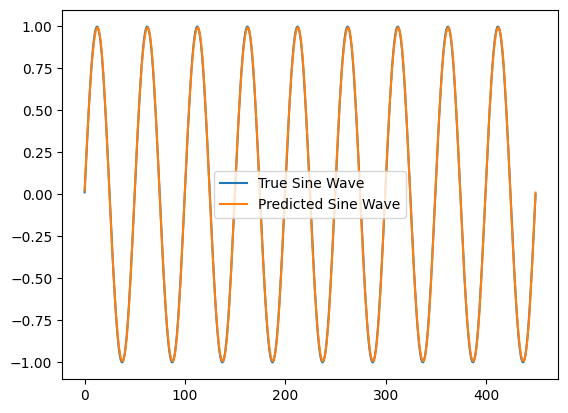

In [25]:
# vanilla GRU
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate sine wave data
def generate_sine_wave(timesteps, steps_per_cycle=50, num_cycles=10):
    x = np.linspace(0, num_cycles * 2 * np.pi, steps_per_cycle * num_cycles)
    y = np.sin(x)
    return y

# Prepare the dataset for the GRU model
def prepare_dataset(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

# Define the GRU-based model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[-1])
        return out

# Parameters
timesteps = 50
steps_per_cycle = 50
num_cycles = 10
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 200

# Generate and prepare the data
y = generate_sine_wave(timesteps, steps_per_cycle, num_cycles)
X, y = prepare_dataset(y, timesteps)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # (batch_size, timesteps, input_size) 
# add the output dimension
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # (batch_size, output_size)

# Initialize the model, loss function, and optimizer
model = GRUModel(input_size=1, hidden_size=hidden_size, output_size=output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X.transpose(0, 1))  # (timesteps, batch_size, input_size)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Predict and plot the results
model.eval()
with torch.no_grad():
    predictions = model(X.transpose(0, 1)).numpy()

plt.plot(y.numpy(), label='True Sine Wave')
plt.plot(predictions, label='Predicted Sine Wave')
plt.legend()
plt.show()


In [30]:
class SimpleLSTM(nn.Module):
    def __init__(self,input_dim,hidden_dim, layer_dim,output_dim):
        super(SimpleLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim # what is layer dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None, c0=None):
        # If hidden and cell states are not provided, initialize them as zeros
        if h0 is None or c0 is None:
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
            c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
        
        # Forward pass through LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Selecting the last output
        return out, hn, cn

In [31]:

# Initialize model, loss, and optimizer
model = SimpleLSTM(input_dim=1, hidden_dim=100, layer_dim=1, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
# Training loop
num_epochs = 100
h0, c0 = None, None  # Initialize hidden and cell states

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs, h0, c0 = model(X, h0, c0)

    # Compute loss
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    # Detach hidden and cell states to prevent backpropagation through the entire sequence
    h0 = h0.detach()
    c0 = c0.detach()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.2038
Epoch [20/100], Loss: 0.0097
Epoch [30/100], Loss: 0.0052
Epoch [40/100], Loss: 0.0004
Epoch [50/100], Loss: 0.0005
Epoch [60/100], Loss: 0.0002
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000


In [ ]:
import torch
import torch.nn as nn

# Define model hyperparameters

vocab_size = 50    # Size of the character vocabulary
embedding_dim = 64 # Dimension of character embeddings
hidden_dim = 128   # Dimension of RNN hidden state
output_dim = 10    # Dimension of the output

# Create the model instance


# Print the model architecture
print(model)

# Example input sequence (batch of sequences of character indices)
example_input = torch.tensor([[1, 2, 3, 4], [4, 3, 2, 1]])  # Batch size = 2, sequence length = 4
output = model(example_input)

print("Output shape:", output.shape)  # Output shape: [batch_size, output_dim]


In [ ]:
######### encoder decoder model ###########

In [3]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import numpy as np

In [4]:
print(torch.__version__)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

2.5.1+cpu


device(type='cpu')

In [11]:
import os
csv_list=[x for x in os.listdir('.') if x.endswith(".csv")]
print(csv_list)

['heart.csv', 'hin_test.csv']


In [12]:
######## pre prossing dataset #########
import csv
csv
with open(csv_list[1], 'r',encoding='utf-8') as file:
  reader = csv.reader(file)
  next(reader)  # Skip the header row if it exists
  pairs=[row for row in reader]


In [13]:
print(pairs[:10])
print(len(pairs))

[['sikhaaega', 'सिखाएगा'], ['learn', 'लर्न'], ['twitters', 'ट्विटर्स'], ['tirunelveli', 'तिरुनेलवेली'], ['independence', 'इंडिपेंडेंस'], ['speshiyon', 'स्पेशियों'], ['shurooh', 'शुरूः'], ['kolhapur', 'कोल्हापुर'], ['ajhar', 'अजहर'], ['karaar', 'क़रार']]
4095


In [14]:
# # Path to text file
# file_path = 'eng_ita_v2.txt'

# # Process the data
# pairs = read_data(file_path)
# len(pairs)

In [15]:
#creating the vocabulary
def tokenize(sentence):
#     print(sentence)
    return sentence.lower().split()


## tokenize and build vocabularies

def build_vocab(pairs):
    eng_vocab=set()
    hin_vocab=set()
    
    for eng,hin in pairs:
        eng_vocab.update(tokenize(eng))
        hin_vocab.update(tokenize(hin))
    return eng_vocab,hin_vocab

english_vocab,hindi_vocab= build_vocab(pairs)


In [17]:
# Creating word to integer mapping
eng_word2int = {word: i for i, word in enumerate(english_vocab)}
hin_word2int = {word: i for i, word in enumerate(hindi_vocab)}

# Creating integer to word mapping
eng_int2word = {i: word for word, i in eng_word2int.items()} # dict.itam()- iterate over dict and returns item and key pair
hin_int2word = {i: word for word, i in hin_word2int.items()}


print(len(english_vocab))
print(len(hindi_vocab))

4070
3373


In [18]:
eng_example = "learn independence"
hind_sentence=pairs[0][1]
# Encoding
eng_encoded = np.array([eng_word2int[word] for word in tokenize(eng_example)], dtype=np.int32)
# ita_encoded = np.array([ita_word2int[word] for word in tokenize(ita_example)], dtype=np.int32)

print('English text encoded:', eng_encoded)
# print('Italian text encoded:', ita_encoded)

# Decoding
print('Decoded English:', ' '.join([eng_int2word[i] for i in eng_encoded]))
# print('Decoded Italian:', ' '.join([ita_int2word[i] for i in ita_encoded]))

English text encoded: [2957 3716]
Decoded English: learn independence


In [19]:
# Special tokens
PAD_TOKEN = "<PAD>"
EOS_TOKEN = "<EOS>"
SOS_TOKEN = "<SOS>"
UNK_TOKEN = "<UNK>"
# Update the function to create mappings to include the special tokens
def create_mappings(vocab):
    vocab = [PAD_TOKEN, SOS_TOKEN, EOS_TOKEN, UNK_TOKEN] + sorted(vocab)
    word2int = {word: i for i, word in enumerate(vocab)}
    int2word = {i: word for word, i in word2int.items()}
    return word2int, int2word

# Update the vocabularies
eng_word2int, eng_int2word = create_mappings(english_vocab)
hin_word2int, hin_int2word = create_mappings(hindi_vocab)

In [21]:
class TranslationDataset(Dataset):
    def __init__(self, pairs, eng_word2int, hin_word2int):
        self.pairs = pairs
        self.eng_word2int = eng_word2int
        self.hin_word2int = hin_word2int

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        eng, hin = self.pairs[idx]
        eng_tensor = torch.tensor([self.eng_word2int[word] for word in tokenize(eng)]
                                  + [self.eng_word2int[EOS_TOKEN]], dtype=torch.long)
        hin_tensor = torch.tensor([self.hin_word2int[word] for word in tokenize(hin)]
                                  + [self.hin_word2int[EOS_TOKEN]], dtype=torch.long)
        return eng_tensor, hin_tensor

# Custom collate function to handle padding # what does it do ?
def collate_fn(batch):
    eng_batch, hin_batch = zip(*batch)
    eng_batch_padded = pad_sequence(eng_batch, batch_first=True, padding_value=eng_word2int[PAD_TOKEN])
    hin_batch_padded = pad_sequence(hin_batch, batch_first=True, padding_value=hin_word2int[PAD_TOKEN])
    return eng_batch_padded, hin_batch_padded

In [22]:
from torch.nn.utils.rnn import pad_sequence

# Create the dataset and DataLoader
translation_dataset = TranslationDataset(pairs, eng_word2int, hin_word2int)
batch_size = 64
translation_dataloader = DataLoader(translation_dataset, batch_size=batch_size,
                                    shuffle=True,  drop_last=True, collate_fn=collate_fn) 
# The dataset will transform the sentence pairs into sequences of integers (tokenized form) 
# so they can be used as input to a machine learning model.

print("Translation samples: ", len(translation_dataset)) ## does what
print("Translation batches: ", len(translation_dataloader)) ## does what

Translation samples:  4095
Translation batches:  63


In [81]:
# Example: iterating over the DataLoader
# for eng, hin in translation_dataloader:
#     print("English batch:", eng)
#     print("Hindi batch:", hin)
#     break # remove this to iterate over the whole dataset

In [82]:
# encoder/decoder RNN

In [23]:
# encoder 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers,
                            batch_first=True)

    def forward(self, x):
        # Reversing the sequence of indices
        x = torch.flip(x, [1])
        embedded = self.embedding(x)
        outputs, (hidden, cell) = self.lstm(embedded)
        return outputs, hidden, cell

In [24]:
# decoder 
class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden, cell):
        out = self.embedding(x)
        out, (hidden, cell) = self.lstm(out, (hidden, cell))
        out = self.fc(out).reshape(out.size(0), -1)
        return out, hidden, cell

In [83]:
# what is the total number of computations done by the network-
# A)
# embd_size=m
# hiden_state=k
# lenght of input and out sequence T
# lenght of vocab V (same for both source and target)



# B)
# total number of parameters in the network


In [26]:
# Hyperparameters
eng_vocab_size = len(eng_word2int)
hin_vocab_size = len(hin_word2int)
embed_size = 256
hidden_size = 512
num_layers = 1

# Initialize the models
encoder = Encoder(eng_vocab_size, embed_size, hidden_size, num_layers).to(device)
decoder = Decoder(hin_vocab_size, embed_size, hidden_size, num_layers).to(device)

In [28]:
# import torchinfo
from torchinfo import summary
print("Encoder summary")
summary(encoder) # do a test pass through of an example input size

Layer (type:depth-idx)                   Param #
Encoder                                  --
├─Embedding: 1-1                         1,042,944
├─LSTM: 1-2                              1,576,960
Total params: 2,619,904
Trainable params: 2,619,904
Non-trainable params: 0

In [31]:
print("Dencoder summary")
summary(decoder) # do a test pass through of an example input size

Dencoder summary


Layer (type:depth-idx)                   Param #
Decoder                                  --
├─Embedding: 1-1                         864,512
├─LSTM: 1-2                              1,576,960
├─Linear: 1-3                            1,732,401
Total params: 4,173,873
Trainable params: 4,173,873
Non-trainable params: 0

In [32]:
def translate(encoder, decoder, sentence, eng_word2int, ita_int2word, max_length=15):
    encoder.eval()
    decoder.eval()
    with torch.inference_mode():
        # Tokenize and encode the sentence
        input_tensor = torch.tensor([eng_word2int[word] for word in tokenize(sentence)]
                                    + [eng_word2int[EOS_TOKEN]], dtype=torch.long)
        input_tensor = input_tensor.view(1, -1).to(DEVICE)  # batch_first=True

        # Pass the input through the encoder
        _, encoder_hidden, encoder_cell = encoder(input_tensor)

        # Initialize the decoder input with the SOS token
        decoder_input = torch.tensor([[eng_word2int[SOS_TOKEN]]], dtype=torch.long)  # SOS
        # Initialize the hidden state of the decoder with the encoder's hidden state
        decoder_hidden, decoder_cell = encoder_hidden, encoder_cell

        # Decoding the sentence
        decoded_words = []
        last_word = torch.tensor([[eng_word2int[SOS_TOKEN]]]).to(DEVICE)
        for di in range(max_length):
            logits, decoder_hidden, decoder_cell = decoder(last_word, decoder_hidden, decoder_cell)
            next_token = logits.argmax(dim=1) # greedy
            last_word = torch.tensor([[next_token]]).to(DEVICE)
            if next_token.item() == ita_word2int[EOS_TOKEN]:
                break
            else:
                decoded_words.append(ita_int2word.get(next_token.item()))

        return ' '.join(decoded_words)

In [34]:
import torch.optim as optim
import torch.nn as nn
import random
DEVICE=device

# Loss Function (exclude padding)
loss_fn = nn.CrossEntropyLoss(ignore_index=eng_word2int[PAD_TOKEN])

# Optimizers
encoder_optimizer = optim.AdamW(encoder.parameters())
decoder_optimizer = optim.AdamW(decoder.parameters())

# Number of epochs
num_epochs = 10

# Training Loop
encoder.train()
decoder.train()

for epoch in range(num_epochs):
    for i, (input_tensor, target_tensor) in enumerate(translation_dataloader):
        input_tensor, target_tensor = input_tensor.to(DEVICE), target_tensor.to(DEVICE)

        # Zero gradients of both optimizers
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        target_length = target_tensor.size(1)

        # Encoder
        _, encoder_hidden, encoder_cell = encoder(input_tensor)

        # Decoder
        decoder_input = torch.full((batch_size, 1), eng_word2int[SOS_TOKEN], dtype=torch.long).to(DEVICE)
        decoder_hidden = encoder_hidden
        decoder_cell = encoder_cell

        # Randomly select a word index from the target sequence
        random_word_index = random.randint(0, target_length - 1)

        loss = 0

        for di in range(target_length):
            logits, decoder_hidden, decoder_cell  = decoder(decoder_input, decoder_hidden, decoder_cell)
            #if di == random_word_index:
            #    loss = loss_fn(logits, target_tensor[:, di])
            #    break  # Only compute loss for the randomly selected word
            loss += loss_fn(logits, target_tensor[:,di])
            decoder_input = target_tensor[:, di].reshape(batch_size, 1)  # Teacher forcing


        # Backpropagation
        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        if i % 100 == 0:  # Print loss every 10 batches
            print(f'Epoch {epoch}, Batch {i}, Loss: {loss.item() / target_length:.4f}')

Epoch 0, Batch 0, Loss: 8.1326
Epoch 1, Batch 0, Loss: 4.0921
Epoch 2, Batch 0, Loss: 4.0616
Epoch 3, Batch 0, Loss: 4.0342
Epoch 4, Batch 0, Loss: 4.0082
Epoch 5, Batch 0, Loss: 3.8943
Epoch 6, Batch 0, Loss: 3.7645
Epoch 7, Batch 0, Loss: 3.6274
Epoch 8, Batch 0, Loss: 3.4195
Epoch 9, Batch 0, Loss: 3.1089


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers,
                            batch_first=True, bidirectional=True)

    def forward(self, x):
        embedded = self.embedding(x)
        outputs, (hidden, cell) = self.lstm(embedded)

        # concatenate hidden states of the bi-directional RNN layer
        hidden = torch.cat((hidden[0,:,:], hidden[1,:,:]), dim=1).unsqueeze(0)
        cell = torch.cat((cell[0,:,:], cell[1,:,:]), dim=1).unsqueeze(0)

        return outputs, hidden, cell

class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden, cell):
        out = self.embedding(x)
        out, (hidden, cell) = self.lstm(out, (hidden, cell))
        out = self.fc(out).reshape(out.size(0), -1)
        return out, hidden, cell

In [37]:
# Hyperparameters
eng_vocab_size = len(eng_word2int)
ita_vocab_size = len(hin_word2int)
embed_size = 256
hidden_size = 512
num_layers = 1

# Initialize the models
encoder = Encoder(eng_vocab_size, embed_size, hidden_size, num_layers).to(DEVICE)
decoder = Decoder(hin_vocab_size, embed_size, hidden_size*2, num_layers).to(DEVICE)